In [135]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

### Load MNIST

In [85]:
mnist = tfds.image.MNIST()

# Describe the dataset with DatasetInfo
assert mnist.info.features['image'].shape == (28, 28, 1)
assert mnist.info.features['label'].num_classes == 10
assert mnist.info.splits['train'].num_examples == 60000

# Download the data, prepare it, and write it to disk
mnist.download_and_prepare()

mnist_dataset = mnist.as_dataset(batch_size=-1)

x_train = mnist_dataset['train']['image']
y_train = mnist_dataset['train']['label']
x_test  = mnist_dataset['test']['image']
y_test  = mnist_dataset['test']['label']

x_train = tf.cast(x_train, tf.float32)/255.0
x_test = tf.cast(x_test, tf.float32)/255.0

## Create and train the model

In [88]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

train_stats = model.fit(
                x = x_train,
                y = y_train,
                shuffle=True,
                epochs=20,
                batch_size=128,
                validation_data=(x_test, y_test),
              )

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.1195 - val_sparse_categorical_accuracy: 0.9635
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9692
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9747
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0796 - val_sparse_categorical_accuracy: 0.9758
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.0744 - val_sparse_categorical_accuracy: 0.9764
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - spars

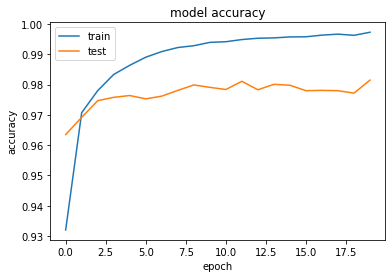

In [89]:
plt.plot(train_stats.history['sparse_categorical_accuracy'])
plt.plot(train_stats.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
predictions_test = model.predict(x_test)

In [95]:
predictions_test.shape

(10000, 10)

In [96]:
predictions_train = model.predict(x_train)

In [167]:
predictions_train

array([[-3.4611275e+01, -3.4223511e+00, -1.3501972e+01, ...,
        -6.4922123e+00, -4.6872311e+00, -6.0117249e+00],
       [-2.6383812e+01,  2.2142614e+01, -1.7067194e+01, ...,
         5.3267026e+00, -1.0082386e+01, -1.2505128e+01],
       [ 2.3907051e+01, -2.1029942e+01, -2.0591605e+00, ...,
        -1.6457083e+01, -1.3467860e+01, -6.7613406e+00],
       ...,
       [-4.5901837e+00, -2.1289085e+01, -2.2071899e+01, ...,
        -2.6665602e+01, -1.3398007e+01, -1.6343275e+01],
       [-3.7453625e+01,  2.0126869e+01, -1.4763664e+01, ...,
        -7.0933766e+00, -5.6623106e+00, -9.6061554e+00],
       [-2.9780289e+01, -3.4090279e+01, -2.9815676e+01, ...,
        -1.8679586e+01,  8.1498137e+00, -2.1983020e-02]], dtype=float32)

## Check Model

Now that the initial model is trained, we need to train our check model.
We need to 

 1. come up with an initial transformation function for x
 2. figure out what shape the check model should be (preferable smaller than initial model)
 3. train so x' -> y'

#### Model 1: Let's try to simply sum up rows of pixels and learn the output from them.

In [150]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [155]:
x_train_check = np.zeros((60000,28,1), dtype=np.float32)
x_test_check = np.zeros((10000,28,1), dtype=np.float32)

In [156]:
# x_train_numpy = x_train.numpy()

In [157]:
for i in range(0,60000):
    x_train_check[i] = sum(x_train[i])

In [158]:
for i in range(0,10000):
    x_test_check[i] = sum(x_test[i])

In [162]:
x_train_check.shape

(60000, 28, 1)

In [115]:
sum(x_train[0]).shape

TensorShape([28, 1])

In [177]:
model_check = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,1)),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10)
])
model_check.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

train_stats = model_check.fit(
                x = x_train_check,
                y = y_train,
                shuffle=True,
                epochs=100,
                batch_size=128,
                validation_data=(x_test_check, y_test),
                verbose=0
              )

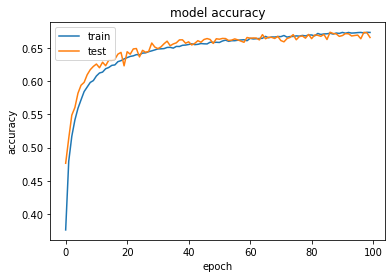

In [178]:
plt.plot(train_stats.history['sparse_categorical_accuracy'])
plt.plot(train_stats.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

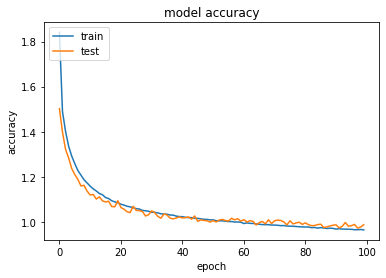

In [179]:
plt.plot(train_stats.history['loss'])
plt.plot(train_stats.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Result summary for model 1

This is basically just doing a worse, less accurate model.
It is only 60% accurate, meaning it is useless for detecting errors
We need to try so

#### Model 2:

For this model, let us sum across multiple inputs (temporally).

For example, lets say our batch size is 5. We sum up all the pixels across that batch
Similar to superimposing multiple images on top of eachother

We will also sum up the results (maybe the raw values, maybe 1 or zero)

Then we will train/test on that data. Worth a shot


